In [1]:
import pandas as pd
import re
import numpy as np
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [14]:
edx_db = pd.read_csv(r"C:\Users\Mattia\Desktop\DataScience\edx_courses.csv")
edx_db

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,Leaders in Citizen Security and Justice Manage...,"Learn about the latest in prevention, police a...",NaN,Self-paced on your time,Inter-American Development Bank,Olga Espinoza-Eduardo Pazinato-Alejandra Mera-...,Intermediate,Social Sciences,English,English,4–5 hours per week,10 Weeks,FREE-Add a Verified Certificate for $25 USD,The high rates of crime and violence are two o...,NaN,https://www.edx.org/course/leaders-in-citizen-...
971,Pattern Studying and Making | 图案审美与创作,Fantastic experiences in beauty and its repres...,NaN,Self-paced on your time,Tsinghua University,Yuehua Nie,Introductory,Art & Culture,中文,"English, 中文",3–5 hours per week,12 Weeks,FREE-Add a Verified Certificate for $139 USD,Are you an original designer? Or a DIY fancier...,NaN,https://www.edx.org/course/pattern-studying-an...
972,Computational Neuroscience: Neuronal Dynamics ...,This course explains the mathematical and comp...,"11,246",Self-paced on your time,École polytechnique fédérale de Lausanne,Wulfram Gerstner,Advanced,Biology & Life Sciences,English,English,4–6 hours per week,6 Weeks,FREE-Add a Verified Certificate for $139 USD,What happens in your brain when you make a dec...,Textbook: Neuronal Dynamics - from single neur...,https://www.edx.org/course/computational-neuro...
973,Cities and the Challenge of Sustainable Develo...,What is a sustainable city? Learn the basics h...,"8,775",Self-paced on your time,SDG Academy,Jeffrey D. Sachs,Introductory,Environmental Studies,English,English,1–2 hours per week,1 Weeks,FREE-Add a Verified Certificate for $25 USD,"According to the United Nations, urbanization ...",Module 1: Introduction to the SDGsProfessor Je...,https:

In [15]:
edx_db2 = edx_db[["title", "price", "course_length", "n_enrolled", "institution","Level","subject","course_type","course_effort"]]
edx_db2["price"]=edx_db2["price"].str.extract('(\d{1,}(.\d{1,})?)')
edx_db2["course_effort"] = edx_db2["course_effort"].str.replace(' hours per week', '')
edx_db2["course_length"] = edx_db2["course_length"].str.replace('Weeks', '')
edx_db2['course_length'] = edx_db2['course_length'].astype(int)
edx_db2["course_length"] = edx_db2.apply(lambda x: x["course_length"]*np.mean(list(map(int, x["course_effort"].split("–")))), axis=1)
edx_db2

,title,price,course_length,n_enrolled,institution,Level,subject,course_type,course_effort
0,How to Learn Online,49,5.0,"124,980",edX,Introductory,Education & Teacher Training,Self-paced on your time,2–3
1,Programming for Everybody (Getting Started wit...,49,21.0,"293,864",The University of Michigan,Introductory,Computer Science,Self-paced on your time,2–4
2,CS50's Introduction to Computer Science,90,144.0,"2,442,271",Harvard University,Introductory,Computer Science,Self-paced on your time,6–18
3,The Analytics Edge,199,162.5,"129,555",Massachusetts Institute of Technology,Intermediate,Data Analysis & Statistics,Instructor-led on a course schedule,10–15
4,Marketing Analytics: Marketing Measurement Str...,249,24.0,"81,140","University of California, Berkeley",Introductory,Computer Science,Self-paced on your time,5–7
...,...,...,...,...,...,...,...,...,...
970,Leaders in Citizen Security and Justice Manage...,25,45.0,NaN,Inter-American Development Bank,Intermediate,Social Sciences,Self-paced on your time,4–5
971,Pattern Studying and Making | 图案审美与创作,139,48.0,NaN,Tsinghua University,Introductory,Art & Culture,Self-paced on your time,3–5
972,Computational Neuroscience: Neuronal Dynamics ...,139,30.0,"11,246",École polytechnique fédérale de Lausanne,Advanced,Biology & Life Sciences,Self-paced on your time,4–6
973,Cities and the Challenge of Sustainable Develo...,25,1.5,"8,775",SDG Academy,Introductory,Environmental Studies,Self-paced on your time,1–2


In [16]:
edx_db2['n_enrolled'] = edx_db2['n_enrolled'].str.replace(",","")
edx_db2['n_enrolled'] = edx_db2['n_enrolled'].fillna(0).astype(int)
edx_db2['price'] = edx_db2['price'].astype(float)
edx_db2['Level'] = edx_db2['Level'].astype('category')
edx_db2['Level'] = edx_db2['Level'].cat.codes
edx_db2['course_type'] = edx_db2['course_type'].astype('category')
edx_db2['course_type'] = edx_db2['course_type'].cat.codes

<AxesSubplot:xlabel='price', ylabel='title'>

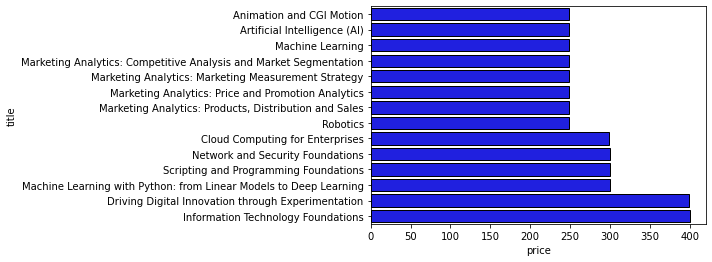

In [31]:
edx_db2 = edx_db2.sort_values(by=['price','title'])
sns.barplot(x = 'price', y = 'title', data = edx_db2[(edx_db2.price>200)&(edx_db2.subject == 'Computer Science')], color = 'blue', edgecolor='black')

<AxesSubplot:xlabel='n_enrolled', ylabel='title'>

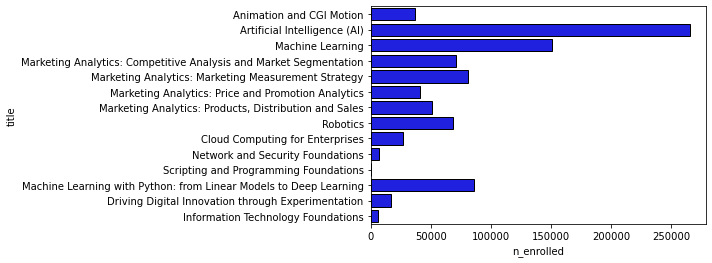

In [32]:
sns.barplot(x = 'n_enrolled', y = 'title', data = edx_db2[(edx_db2.price>200)&(edx_db2.subject == 'Computer Science')], color = 'blue', edgecolor='black')

In [19]:
px.scatter(edx_db2, x = 'course_length', y = 'price')

In [35]:
edx_db2[["price","n_enrolled","course_length"]].mean()

price              100.465497
n_enrolled       46705.230769
course_length       34.405641
dtype: float64

In [37]:
edx_db_user = pd.read_csv(r"C:\Users\Mattia\Desktop\DataScience\appendix.csv")
edx_db_user

,Institution,Course Number,Launch Date,Course Title,Instructors,Course Subject,Year,Honor Code Certificates,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),...,% Certified of > 50% Course Content Accessed,% Played Video,% Posted in Forum,% Grade Higher Than Zero,Total Course Hours (Thousands),Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
0,MITx,6.002x,09/05/2012,Circuits and Electronics,Khurram Afridi,"Science, Technology, Engineering, and Mathematics",1,1,36105,5431,...,54.98,83.2,8.17,28.97,418.94,64.45,26.0,88.28,11.72,60.68
1,MITx,6.00x,09/26/2012,Introduction to Computer Science and Programming,"Eric Grimson, John Guttag, Chris Terman",Computer Science,1,1,62709,8949,...,64.05,89.14,14.38,39.50,884.04,78.53,28.0,83.50,16.50,63.04
2,MITx,3.091x,10/09/2012,Introduction to Solid State Chemistry,Michael Cima,"Science, Technology, Engineering, and Mathematics",1,1,16663,2855,...,72.85,87.49,14.42,34.89,227.55,61.28,27.0,70.32,29.68,58.76
3,HarvardX,CS50x,10/15/2012,Introduction to Computer Science,"David Malan, Nate Hardison, Rob Bowden, Tommy ...",Computer Science,1,1,129400,12888,...,11.11,0,0.00,1.11,220.90,0.00,28.0,80.02,19.98,58.78
4,HarvardX,PH207x,10/15/2012,Health in Numbers: Quantitative Methods in Cli...,"Earl Francis Cook, Marcello Pagano","Government, Health, and Social Science",1,1,52521,10729,...,47.12,77.45,15.98,32.52,804.41,76.10,32.0,56.78,43.22,88.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,HarvardX,MUS24.4x,07/21/2016,First Nights: Symphonie Fantastique,Tom Kelly,"Humanities, History, Design, Religion, and Edu...",4,0,615,305,...,6.56,80.81,8.78,3.25,1.71,5.93,38.0,56.82,43.18,74.66
286,HarvardX,GSE4x,07/25/2016,Introduction to Family Engagement in Education,Karen Mapp,"Humanities, History, Design, Religion, and Edu...",4,0,2871,267,...,7.49,70.11,0.00,0.70,4.26,11.33,34.0,25.24,74.76,82.31
287,MITx,6.302.0x,08/01/2016,Introduction to Control System Design,"Jacob White, Joe Steinmeyer","Science, Technology, Engineering, and Mathematics",4,0,3937,974,...,5.03,12.27,4.72,8.23,15.62,58.50,24.0,91.17,8.83,61.32
288,MITx,6.302.1x,08/01/2016,Introduction to State Space Control,"Jacob White, Joe Steinmeyer","Science, Technology, Engineering, and Mathematics",4,0,1431,208,...,3.85,0,3.84,5.73,3.22,62.38,25.0,93.44,6.56,72.31


In [43]:
for i in edx_db_user["Course Subject"].unique():
    print(str(i) + ": " + str(len(edx_db_user[edx_db_user["Course Subject"]==i])))

Science, Technology, Engineering, and Mathematics: 91
Computer Science: 30
Government, Health, and Social Science: 75
Humanities, History, Design, Religion, and Education: 94


In [51]:
edx_db_user[["Course Subject","Participants (Course Content Accessed)","Certified", "Median Hours for Certification", "Median Age"]].groupby(["Course Subject"], sort=False).sum()

,Participants (Course Content Accessed),Certified,Median Hours for Certification,Median Age
Course Subject,,,,
"Science, Technology, Engineering, and Mathematics",1082060,44878,7151.01,2372.5
Computer Science,1527334,51343,1349.27,805.0
"Government, Health, and Social Science",1017960,82267,2706.93,2230.0
"Humanities, History, Design, Religion, and Education",822503,66217,1658.51,3089.5


In [3]:
edx_udemy = pd.read_csv(r"C:\Users\Mattia\Desktop\DataScience\multiTimeline.csv")

In [4]:
edx_udemy['Time'] = pd.to_datetime(edx_udemy['Mese'])
edx_udemy['edx'] = edx_udemy['edx: (Tutto il mondo)'].astype(float)
edx_udemy['udemy'] = edx_udemy['udemy: (Tutto il mondo)'].astype(float)
edx_udemy

,Mese,edx: (Tutto il mondo),udemy: (Tutto il mondo),coursera: (Tutto il mondo),Time,edx,udemy
0,2013-01,8,2,29,2013-01-01,8.0,2.0
1,2013-02,9,2,33,2013-02-01,9.0,2.0
2,2013-03,9,2,31,2013-03-01,9.0,2.0
3,2013-04,9,2,29,2013-04-01,9.0,2.0
4,2013-05,8,2,32,2013-05-01,8.0,2.0
...,...,...,...,...,...,...,...
115,2022-08,11,98,49,2022-08-01,11.0,98.0
116,2022-09,11,90,45,2022-09-01,11.0,90.0
117,2022-10,10,82,45,2022-10-01,10.0,82.0
118,2022-11,9,90,44,2022-11-01,9.0,90.0


In [25]:
fg = go.Figure() 
fg.add_trace(go.Scatter(x=edx_udemy.Time, y=edx_udemy.udemy, name = "Udemy"))
fg.add_trace(go.Scatter(x=edx_udemy['Time'], y=edx_udemy.edx, mode='lines',name="Edx"))
fg.update_layout(
    title="Variation of Google Search over time",
    xaxis_title="Time",
    yaxis_title="Google Searches",
    template="simple_white",
    font=dict(
        family="Courier New, monospace",
        size=18,
    )
)

fg.show()